# Step 2: Data Processing and Feature Extraction

In this notebook, I perform further preprocessing of the mini dataset created in the previous notebook. 
I will:
- Load and clean the label metadata using Pandas.
- Preprocess the images (scaling, normalization, resizing) using Pillow.
- (Optionally) demonstrate a simple NLP workflow using SpaCy on sample text extracted from documents.

This step is crucial for:
- Ensuring that my data is properly structured for training machine learning models.
- Preparing image data to be fed into deep learning architectures.
- Demonstrating versatility with both image and text data processing in my project portfolio.


## Importing Required Libraries

I will be using:
- **Pandas:** For handling and cleaning tabular metadata.
- **Pillow:** For image loading and preprocessing.
- **Matplotlib & NumPy:** For visualizing and processing images.
- **SpaCy (Optional):** For NLP tasks to process textual content from documents.


In [10]:
# Import libraries for data manipulation and visualization
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Optional: Import SpaCy for NLP tasks
import spacy


## Process Label Files with Pandas

In this step what I'm going to do:
- Read one of the label files (e.g., train.txt) from the mini dataset.
- Process the file line by line to account for labels that may contain spaces.
- Store the resulting data in a Pandas DataFrame for further analysis.


In [ ]:
def load_labels(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Split only on the first space so that the label (which may contain spaces) is read correctly.
            parts = line.strip().split(' ', 1)
            if len(parts) == 2:
                filename, label = parts
                data.append((filename, label))
    return pd.DataFrame(data, columns=['filename', 'label'])


In [ ]:
# File paths for the label files
labels_train_file = 'data/rvl-cdip-mini-dataset/labels/train.txt'
labels_val_file   = 'data/rvl-cdip-mini-dataset/labels/val.txt'
labels_test_file  = 'data/rvl-cdip-mini-dataset/labels/test.txt'

# Loading labels for each dataset
df_train = load_labels(labels_train_file)
df_val   = load_labels(labels_val_file)
df_test  = load_labels(labels_test_file)

# For verification – display a few rows from each dataset
print("Train Labels:")
print(df_train.head())
print("-----------")
print("Validation Labels:")
print(df_val.head())
print("-----------")
print("Test Labels:")
print(df_test.head())


Train Labels:
         filename label
0  2045722830.tif    15
1  2021642929.tif     1
2    11003164.tif     8
3  2069728659.tif     7
4  2022194733.tif     5
-----------
Validation Labels:
          filename label
0   0000175717.tif    10
1   2501028719.tif    12
2   2083780889.tif     9
3  tob14511.95.tif     9
4   2028697173.tif     9
-----------
Test Labels:
                    filename label
0             2050283643.tif     8
1  1000258657_1000258661.tif     6
2             2084376282.tif     1
3             2081387963.tif    12
4            2085752257a.tif     2


## Preprocess Images

For images what I'm going to do:
- Load a sample image from the mini dataset.
- Convert it to grayscale (if needed), resize it to a standard dimension (e.g., 224x224), and normalize pixel values.
- This preprocessing is essential for feeding image data into machine learning models, especially neural networks.


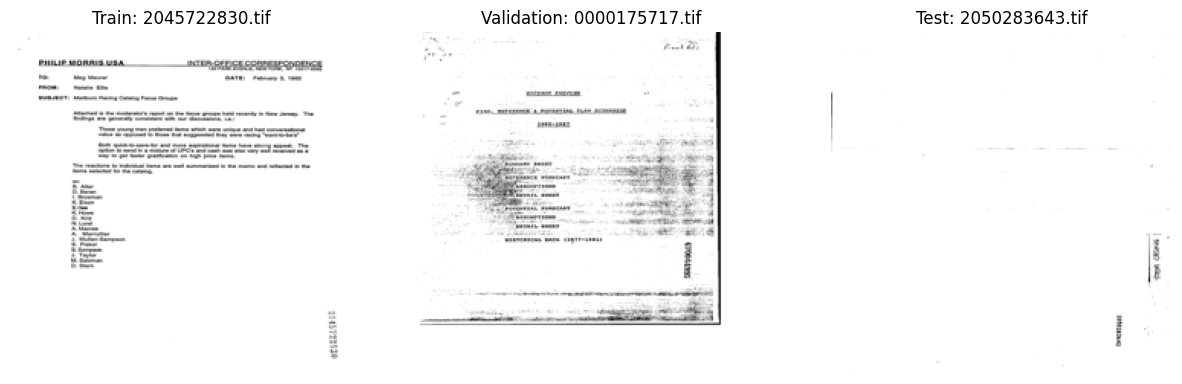

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to load labels from a given text file.
# Each line is expected to contain the image filename and its label separated by a space.
def load_labels(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Split only on the first space to capture the full label even if it contains spaces.
            parts = line.strip().split(' ', 1)
            if len(parts) == 2:
                filename, label = parts
                data.append((filename, label))
    return pd.DataFrame(data, columns=['filename', 'label'])

# Define paths to the label files for training, validation, and test sets.
labels_train_file = 'data/rvl-cdip-mini-dataset/labels/train.txt'
labels_val_file   = 'data/rvl-cdip-mini-dataset/labels/val.txt'
labels_test_file  = 'data/rvl-cdip-mini-dataset/labels/test.txt'

# Load the label DataFrames.
df_train = load_labels(labels_train_file)
df_val   = load_labels(labels_val_file)
df_test  = load_labels(labels_test_file)

# Define the path to the images directory.
images_dir = 'data/rvl-cdip-mini-dataset/images'

# Function to preprocess a single image.
# It opens the image, converts it to grayscale, resizes it to the specified dimensions,
# and normalizes the pixel values to the range [0, 1].
def preprocess_image(filename, images_dir=images_dir, size=(224, 224)):
    image_path = os.path.join(images_dir, filename)
    # Open the image using Pillow.
    img = Image.open(image_path)
    # Convert the image to grayscale.
    img_gray = img.convert('L')
    # Resize the image to the specified size.
    img_resized = img_gray.resize(size)
    # Convert the image to a numpy array and normalize pixel values to [0, 1].
    img_array = np.array(img_resized) / 255.0
    return img_array

# Apply the preprocessing function to each DataFrame.
# A new column 'image_array' is added with the processed image data.
df_train['image_array'] = df_train['filename'].apply(lambda fn: preprocess_image(fn))
df_val['image_array']   = df_val['filename'].apply(lambda fn: preprocess_image(fn))
df_test['image_array']  = df_test['filename'].apply(lambda fn: preprocess_image(fn))

# Visualize a sample processed image from each dataset.
sample_train = df_train.iloc[0]
sample_val   = df_val.iloc[0]
sample_test  = df_test.iloc[0]

plt.figure(figsize=(15, 5))

# Display sample image from the training set.
plt.subplot(1, 3, 1)
plt.imshow(sample_train['image_array'], cmap='gray')
plt.title(f"Train: {sample_train['filename']}")
plt.axis('off')

# Display sample image from the validation set.
plt.subplot(1, 3, 2)
plt.imshow(sample_val['image_array'], cmap='gray')
plt.title(f"Validation: {sample_val['filename']}")
plt.axis('off')

# Display sample image from the test set.
plt.subplot(1, 3, 3)
plt.imshow(sample_test['image_array'], cmap='gray')
plt.title(f"Test: {sample_test['filename']}")
plt.axis('off')

plt.show()


## (Optional) OCR and NLP Processing on Extracted Text

In this step I  perform OCR on a sample document image to extract its text using `pytesseract`.
After extracting the text I use SpaCy's NLP pipeline to tokenize the text and display named entities.

In [23]:
# brew install tesseract
# brew install tesseract-lang

# pip install pytesseract

Processing Train image: data/rvl-cdip-mini-dataset/images/2045722830.tif


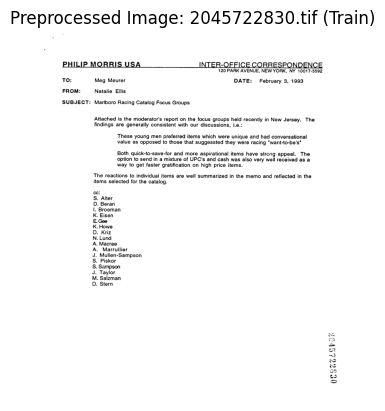

Extracted Text from Train Document:
PHILIP MORRIS USA INTER-OFFICE CORRESPONDENCE
120 PARK AVENUE, NEW YORK, NY 10017-5592
TO: Meg Meurer DATE: February 3, 1993
FROM: Natalie Ellis
SUBJECT: Marlboro Racing Catalog Focus Groups
Attached is the moderator's report on the focus groups held recently in New Jersey. The
findings are generally consistent with our discussions, i.e.:
These young men preferred items which were unique and had conversational
value as opposed to those that suggessted they were racing “want-to-be's"
Both quick-to-save-for and more aspirational items have strong appeal. The
option to send in a mixture of UPC's and cash was also very well received as a
way to get faster gratification on high price items.
The reactions to individual items are well summarized in the memo and reflected in the
items selected for the catalog.
ce:
S. Alter
D. Beran
|. Broeman
K. Eisen
E. Gea
K. Howe
D. Kriz
N. Lund
A. Macrae
A. Marrullier
J. Mutlen-Sampson
S. Piskor
S. Sampson
J. Taylor
M. S

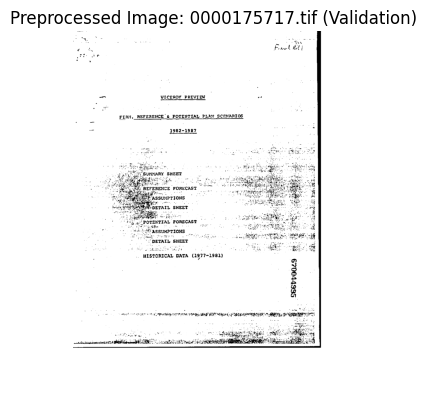

Extracted Text from Validation Document:
- we wo a . Soe Come
wh
— .
¢ my B, wor Rel {
veer ®
°° 7
—_ VICEROY PREVIEW oe
FIRM, REFERENCE & POTENTIAL PLAN SCENARIOS
en we gg BUMMARY SHEET . iano ae anaes
“s veg oer SEN Eig tae frp OT Ba Rg PG ISS et PAR ss
mt UND ag ESE SSUNPT IONS me OS ER gee REL BTR he
a aes AE! a git, So . ae ae ot eae her “08
7. 6 ‘mem leh . “ANey aA IRAILY eae) SORE aie eR 44
. .. HISTORICAL DATA (1377-1981) -
; ee
a
Tag Et co ea aptly Dre te MeO BE IT AI SF TEBE RATERS 8 REENG,» Se RRINS Sanr


Tokens:
['-', 'we', 'wo', 'a', '.', 'Soe', 'Come', '\n', 'wh', '\n', '—', '.', '\n', '¢', 'my', 'B', ',', 'wor', 'Rel', '{', '\n', 'veer', '®', '\n', '°', '°', '7', '\n', '—', '_', 'VICEROY', 'PREVIEW', 'oe', '\n', 'FIRM', ',', 'REFERENCE', '&', 'POTENTIAL', 'PLAN', 'SCENARIOS', '\n', 'en', 'we', 'gg', 'BUMMARY', 'SHEET', '.', 'iano', 'ae', 'anaes', '\n', '“', 's', 'veg', 'oer', 'SEN', 'Eig', 'tae', 'frp', 'OT', 'Ba', 'Rg', 'PG', 'ISS', 'et', 'PAR', 'ss', '\n', 'mt', 'UND'

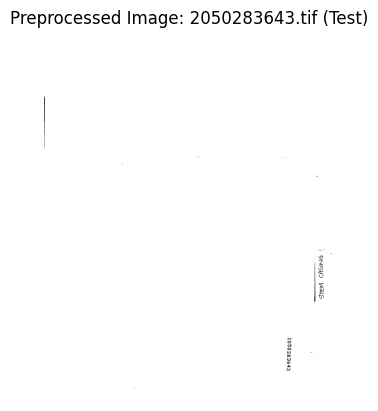

Extracted Text from Test Document:
| 2
v
U
Zz
i
nN
[aw]
cA
oOo
hy .
GW .
an
Ba
a


Tokens:
['|', '2', '\n', 'v', '\n', 'U', '\n', 'Zz', '\n', 'i', '\n', 'nN', '\n', '[', 'aw', ']', '\n', 'cA', '\n', 'oOo', '\n', 'hy', '.', '\n', 'GW', '.', '\n', 'an', '\n', 'Ba', '\n', 'a', '\n']

Named Entities:
2 CARDINAL
GW PERSON


In [ ]:
import os
import pytesseract
from PIL import Image, ImageOps
import spacy
import matplotlib.pyplot as plt
import numpy as np

# Load the SpaCy English NLP model
nlp = spacy.load("en_core_web_sm")

def process_sample_ocr_nlp(df, dataset_name="Sample"):
    """
    Processes a sample image from the provided DataFrame using OCR and NLP.
    
    Parameters:
        df (DataFrame): The DataFrame containing the image filenames (column 'filename').
        dataset_name (str): Name of the dataset (for display purposes).
    """
    # Define the path to the images directory
    images_dir = 'data/rvl-cdip-mini-dataset/images'
    
    # Use the first sample from the provided DataFrame
    sample_filename = df.iloc[0]['filename']
    sample_image_path = os.path.join(images_dir, sample_filename)
    
    print(f"Processing {dataset_name} image:", sample_image_path)
    
    # Open the image using Pillow and convert it to grayscale
    img = Image.open(sample_image_path)
    img_gray = img.convert('L')
    
    # Upscale the image (scale factor e.g., 3x) to improve OCR resolution
    width, height = img_gray.size
    scale_factor = 3
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    img_resized = img_gray.resize((new_width, new_height), Image.LANCZOS)
    
    # Apply autocontrast to enhance image contrast
    img_contrast = ImageOps.autocontrast(img_resized)
    
    # Apply thresholding to create a binary image (0 if below threshold, otherwise 255)
    threshold_value = 128  # Adjust threshold if necessary
    img_threshold = img_contrast.point(lambda x: 0 if x < threshold_value else 255, '1')
    
    # Visualize the preprocessed image to ensure text clarity
    img_array = np.array(img_threshold) / 255.0  # Normalize for visualization
    plt.imshow(img_array, cmap='gray')
    plt.title(f"Preprocessed Image: {sample_filename} ({dataset_name})")
    plt.axis('off')
    plt.show()
    
    # Configure Tesseract options (using Page Segmentation Mode 6: assume a uniform block of text)
    custom_config = r'--oem 3 --psm 6'
    
    # Perform OCR on the processed image to extract text
    extracted_text = pytesseract.image_to_string(img_threshold, config=custom_config)
    print(f"Extracted Text from {dataset_name} Document:")
    print(extracted_text)
    
    # Process the extracted text using SpaCy for tokenization and Named Entity Recognition (NER)
    doc = nlp(extracted_text)
    
    print("\nTokens:")
    print([token.text for token in doc])
    
    print("\nNamed Entities:")
    for ent in doc.ents:
        print(ent.text, ent.label_)

# Now process a sample from each of the three DataFrames

# For training set
process_sample_ocr_nlp(df_train, dataset_name="Train")

# For validation set
process_sample_ocr_nlp(df_val, dataset_name="Validation")

# For test set
process_sample_ocr_nlp(df_test, dataset_name="Test")


-------------------------------------
-------------------------------------
-------------------------------------

# Step 3: Building a Machine Learning Model for Document Classification

In this step I build and evaluate machine learning models using the mini dataset created in Step 1 (`1-create_mini_dataset.ipynb`) and preprocessed in Step 2 (code above).

I'm planning to develop two types of models:
- A **classical baseline model** using Scikit-learn (e.g., Logistic Regression, Decision Tree, or SVM). This model serves as a benchmark and includes cross validation and hyperparameter tuning using GridSearchCV.
- A **deep learning model** using TensorFlow/Keras in the form of a Convolutional Neural Network (CNN) that learns features directly from the document images.

Why?

To demonstrate my ability to work with both traditional machine learning and modern deep learning techniques.


## Data Overview

For this stage I use the output data from Step 2 (Data Preprocessing and Feature Extraction). The preprocessed images along with their corresponding label information are now stored in three separate Pandas DataFrames: `df_train`, `df_val`, and `df_test`. Each DataFrame contains:
- The image filename (in column `filename`)
- The corresponding class label (in column `label`)

This split allows me to use `df_train` for training the model, `df_val` for hyperparameter tuning and validation, and `df_test` for the final evaluation.


In [19]:
import os
import numpy as np
from PIL import Image
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report


# --------------------------------------------------------------------------------------------------
# Feature Extraction 
# --------------------------------------------------------------------------------------------------

# Define the path to the images directory (adjust if required)
images_dir = 'data/rvl-cdip-mini-dataset/images'

# Function to extract HOG features from images listed in a DataFrame.
def extract_hog_features(df, image_size=(224, 224)):
    features = []
    for fname in df['filename']:
        # Build the full image path
        path = os.path.join(images_dir, fname)
        # Open the image, convert to grayscale, and resize to the standard dimension
        img = Image.open(path).convert('L').resize(image_size)
        img_arr = np.array(img)
        # Extract HOG features; visualize is set to True but the output image is ignored.
        hog_feats, _ = hog(img_arr,
                           orientations=8,
                           pixels_per_cell=(16, 16),
                           cells_per_block=(2, 2),
                           visualize=True,
                           channel_axis=None)
        features.append(hog_feats)
    return np.array(features)

# Extract features and labels for each set using the corresponding DataFrame.
features_train = extract_hog_features(df_train)
labels_train = df_train['label'].astype(int).tolist()

features_val = extract_hog_features(df_val)
labels_val = df_val['label'].astype(int).tolist()

features_test = extract_hog_features(df_test)
labels_test = df_test['label'].astype(int).tolist()

# Dimensionality reduction: Fit PCA on the training features and transform the validation and test sets.
pca = PCA(n_components=100)
features_train_reduced = pca.fit_transform(features_train)
features_val_reduced = pca.transform(features_val)
features_test_reduced = pca.transform(features_test)


## Model training

In [22]:
# --------------------------------------------------------------------------------------------------
# Model Training Section: Train an SVM using GridSearchCV and evaluate on both validation and test sets.
# --------------------------------------------------------------------------------------------------
# param_grid = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf', 'linear', 'poly']}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm = SVC()

# Perform grid search on the reduced training features.
grid_search = GridSearchCV(svm, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(features_train_reduced, labels_train)

print("Best SVM parameters:", grid_search.best_params_)
print("----------------------------------------------------")

# Evaluate the best model on the validation set.
y_val_pred = grid_search.predict(features_val_reduced)
print("Validation Set Classification Report:")
print(classification_report(labels_val, y_val_pred))
print("----------------------------------------------------")

# Evaluate the best model on the test set.
y_test_pred = grid_search.predict(features_test_reduced)
print("Test Set Classification Report:")
print(classification_report(labels_test, y_test_pred))


0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0

Best SVM parameters: {'C': 10, 'kernel': 'rbf'}
----------------------------------------------------
Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.31      0.26        16
           1       0.44      0.35      0.39        20
           2       0.92      0.92      0.92        13
           3       0.77      0.81      0.79        21
           4       0.48      0.58      0.52        19
           5       0.08      0.09      0.09        11
           6       0.60      0.60      0.60        20
           7       0.40      0.55      0.46        11
           8       0.58      0.85      0.69        13
           9       0.38      0.17      0.23        18
          10       0.71      0.29      0.42        17
          11       0.27      0.30      0.29        10
          12       0.41      0.41      0.41        17
          13       0.26      0.25      0.26        20
          14       0.71      0.59      0.65       

## Deep Learning Model Using TensorFlow/Keras

Next I build a Convolutional Neural Network (CNN) to classify document images. For this portion I reshape the preprocessed images back into 2D form. Note that while the classical model used a 224×224 resized image, for the CNN I may choose to upscale the images (for example using a 3× scaling factor) so that the network has more detailed input for feature learning.

In the steps below I'm going to do:
- Reload and preprocess the images (this time, upscaling them as needed, applying normalization).
- Build a simple CNN model.
- Train the model using early stopping.
- Evaluate the model using a held-out test set.


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Parameters for image size and batch size
img_height, img_width, channels = 224, 224, 3  # using color channels for pre-trained networks
batch_size = 32

# Create an ImageDataGenerator for training with augmentation and rescaling.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# For validation and test, only rescaling is applied.
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Build training generator using df_train
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,          # use the training DataFrame
    directory=images_dir,        # path to images folder
    x_col='filename',            # image filename column
    y_col='label',               # class label column
    target_size=(img_height, img_width),
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=True,
    seed=42
)

# Build validation generator using df_val
validation_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,            # validation DataFrame
    directory=images_dir,
    x_col='filename',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=False,
    seed=42
)

# Optionally, build a test generator using df_test
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,           # test DataFrame
    directory=images_dir,
    x_col='filename',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=False,
    seed=42
)

# Build the CNN model: we use the pre-trained VGG16 model as a convolutional base.
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, channels))
base_model.trainable = False  # Freeze the convolutional base

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
# Determine the number of classes based on the training DataFrame labels.
num_classes = len(np.unique(df_train['label'].astype(int)))
prediction = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=prediction)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Set up early stopping callback
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]


Found 1995 validated image filenames belonging to 16 classes.
Found 259 validated image filenames belonging to 16 classes.
Found 253 validated image filenames belonging to 16 classes.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_c

In [ ]:
# Train the model using the training generator and validate using the validation generator.
# Note: epochs are set to 5 to limit training time.
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=callbacks
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Accuracy:", val_accuracy)

# (Optional) Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

Epoch 1/5


2025-02-18 17:07:21.249382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


63/63 [==============================] - ETA: 0s - loss: 2.6152 - accuracy: 0.1323

2025-02-18 17:10:40.632717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


63/63 [==============================] - 226s 4s/step - loss: 2.6152 - accuracy: 0.1323 - val_loss: 2.4882 - val_accuracy: 0.1583
Epoch 2/5
63/63 [==============================] - 268s 4s/step - loss: 2.5264 - accuracy: 0.1599 - val_loss: 2.3352 - val_accuracy: 0.2355
Epoch 3/5
63/63 [==============================] - 268s 4s/step - loss: 2.4419 - accuracy: 0.1905 - val_loss: 2.3223 - val_accuracy: 0.2934
Epoch 4/5
63/63 [==============================] - 282s 4s/step - loss: 2.3915 - accuracy: 0.2010 - val_loss: 2.2349 - val_accuracy: 0.2857
Epoch 5/5
63/63 [==============================] - 263s 4s/step - loss: 2.3628 - accuracy: 0.2180 - val_loss: 2.1593 - val_accuracy: 0.3475


2025-02-18 17:29:08.509063: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


9/9 [==============================] - 30s 3s/step - loss: 2.1593 - accuracy: 0.3475
Validation Accuracy: 0.3474903404712677


2025-02-18 17:29:38.468471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - 29s 4s/step - loss: 2.1313 - accuracy: 0.3755
Test Accuracy: 0.3754940629005432


## Model Comparison and Summary

In this notebook, I developed and evaluated two distinct approaches for document classification using a partitioned dataset divided into training, validation, and test subsets.

### 1. Classical Model (SVM with Handcrafted Features)
- **Feature Extraction:**  
  I extracted image features using the Histogram of Oriented Gradients (HOG) algorithm on resized 224×224 grayscale images. Dimensionality reduction was then performed with PCA on the training set features.
- **Model Training and Evaluation:**  
  I tuned an SVM classifier using GridSearchCV in combination with Stratified K-Fold cross-validation, ensuring that data from each class was proportionally represented. The model was trained on **df_train** and initially evaluated on **df_val**. Finally, I measured its generalization capability on the held‐out test set (**df_test**).
  
### 2. Deep Learning Model (CNN)
- **Data Preparation:**  
  For the CNN, I reloaded and preprocessed the images separately for each data subset. Dedicated ImageDataGenerators handled the three DataFrames:  
  - **df_train:** I applied data augmentation (rotation, shifting, horizontal flips) and rescaling.  
  - **df_val and df_test:** Only rescaling was applied.  
  The images were resized to 224×224 with three color channels (suitable for pre-trained networks) and optionally upscaled for improved resolution.
- **Model Architecture:**  
  I built a convolutional neural network by leveraging a pre-trained VGG16 as the convolutional base with its top layers removed and frozen. On top of this base, I added a custom classification head (Flatten, Dense, and Dropout layers) with an output layer sized according to the number of unique classes.
- **Training Strategy:**  
  During model training, I applied early stopping (with epochs set to 5 in my experiments to limit computation time) to prevent overfitting. The model was trained using the training generator from **df_train** and validated on the generator from **df_val**. Final evaluation was performed on the generator from **df_test**.

### Comparison and Insights
- **Feature Learning:**  
  The classical approach relies on handcrafted features (HOG + PCA), whereas the deep learning approach employs automatic feature learning from raw image data.
- **Data Partitioning:**  
  Using three separate DataFrames (**df_train**, **df_val**, and **df_test**) ensured a strict separation between training, tuning, and final evaluation. This structure underpinned both reliable hyperparameter tuning and an unbiased assessment of my model’s generalization.
- **Model Performance:**  
  Comparing the SVM with the CNN helped me understand the trade-offs between traditional machine learning techniques and modern deep learning approaches. These insights lay the groundwork for further experiments where techniques like data augmentation, deeper architectures, or integration of multi-modal features could be explored.

This notebook demonstrates my ability to design, implement, and evaluate multiple model architectures for document classification using robust data partitioning strategies.
